# **79 DAPT SAO IH Hotel Booking**
**Predicting hotel booking cancellations with ML!**

Data source : [Link](https://www.kaggle.com/competitions/79-dapt-ih-hotel-booking/data)

The 79 DAPT SAO IH Hotel Booking describes two datasets with hotel demand data. One of the hotels is a resort hotel and the other is a city hotel. Both datasets share the same structure. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. 

**Attribute Information:**  
1. hotel [Type of hotel]
2. is_cancelled [Value indicating if the booking was canceled (1) or not (0)]
3. lead_time [Number of days that elapsed between the entering date of the booking into the PMS and the arrival date]
4. stays_in_weekend_nights [Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel]
5. stays_in_week_nights [Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel]
6. adults [Number of adults]
7. children [Number of children]
8. babies [Number of babies]
9. meal [Type of meal booked]
10. country [Country of origin]
11. market_segment [Market segment designation]
12. distribution_channel [Booking distribution channe]
13. is_repeated_guest [Value indicating if the booking name was from a repeated guest (1) or not (0)]
14. previous_cancellations [Number of previous bookings that were cancelled by the customer prior to the current booking]
15. previous_bookings_not_canceled [Number of previous bookings not cancelled by the customer prior to the current booking]
16. reserved_room_type [Code of room type reserved]
17. assigned_room_type [Code for the type of room assigned to the booking. ]
18. booking_changes [Number of changes/amendments made to the booking]
19. deposit_type [Indication on if the customer made a deposit to guarantee the booking]
20. agent [ID of the travel agency that made the booking]
21. company [ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons]
22. days_in_waiting_list [Number of days the booking was in the waiting list before it was confirmed to the customer]
23. customer_type [Type of booking]
24. adr [Average Daily Rate calculated by dividing the sum of all lodging transactions by the total number of staying nights]
25. required_car_parking_spaces [Number of car parking spaces required by the customer]
26. total_of_special_requests [Number of special requests made by the customer]
27. reservation_status_date [Date at which the last status was set]
28. arrival_date [Date of arrival]
29. id_booking [ID of booking]


## Objective
Booking cancellations often directly impact a hotel's bottom line: many times the room(s) reserved are not booked again, resulting in lower occupation and, subsequently, revenue. To hedge this risk, hotels often demand a booking deposit, often calculated as a percentage of the reservations full price. However, this practice can directly impact demand as some customers might look for different hotels with no deposit (or a smaller one). **Our goal is to build a model that, by predicting whether a booking will be cancelled or not, can be used by the hotel to implement different risk-aware strategies for calculating the deposit size.**

In [1]:
!pip install opendatasets --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import opendatasets as od
import warnings
warnings.filterwarnings('ignore')


plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Reading the data

In [3]:
url = 'https://www.kaggle.com/competitions/79-dapt-ih-hotel-booking/data'
od.download(url)

100%|██████████| 1.57M/1.57M [00:00<00:00, 108MB/s]


Extracting archive ./79-dapt-ih-hotel-booking/79-dapt-ih-hotel-booking.zip to ./79-dapt-ih-hotel-booking


The folder contains three datasets:
- *tb_hotel_traintest.csv*  for training
- *tb_hotel_feat_valid_2.csv*  for testing
- *tb_hotel_sample_valid.csv* for submitting results

In [4]:
df_train = pd.read_csv('79-dapt-ih-hotel-booking/tb_hotel_traintest.csv')
df_test = pd.read_csv('79-dapt-ih-hotel-booking/tb_hotel_feat_valid_2.csv')
df_sample = pd.read_csv('79-dapt-ih-hotel-booking/tb_hotel_sample_valid.csv')

Let's check the shape of datasets

In [5]:
df_train.shape, df_test.shape, df_sample.shape

((113409, 29), (5981, 28), (5981, 2))

To analyse the dataset, I will group train and test datas in one dataframe

In [6]:
hotel_origin = pd.concat([df_train, df_test])

In [7]:
hotel_origin.shape

(119390, 29)

The dataset contains over 119390 rows and 29 columns

**Basic information about the data set**

In [8]:
hotel_origin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 5980
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_cancelled                    113409 non-null  float64
 2   lead_time                       119390 non-null  int64  
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   children                        119386 non-null  float64
 7   babies                          119390 non-null  int64  
 8   meal                            119390 non-null  object 
 9   country                         118902 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  distribution_channel            119390 non-null  object 
 12  is_repeated_guest 

In [9]:
hotel_origin.describe().T

,count,mean,std,min,25%,50%,75%,max
is_cancelled,113409.0,0.370658,0.482983,0.00,0.00,0.000,1.00,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.00,737.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.00,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.00,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.00,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.00,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.00,10.0
is_repeated_guest,119390.0,0.031912,0.175767,0.00,0.00,0.000,0.00,1.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.00,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.00,72.0


I remark that the minimum of the average daily rate (`adr`) is negative, this is an absurd thing, since the `adr` is calculated by dividing of all *lodging transactions* by the total number of staying nights. Also knowing that by definition an *lodging transactions* means a charge to an occupant by a lodging operator for the occupancy of any short-term rental or vacation rental using a short-term rental marketplace.  
In short, it seems strange that a hotel accommodates customers and in addition gives them money. For that let's see how many customers have a negative `adr`.

In [10]:
hotel_origin[hotel_origin['adr'] < 0]['adr']

14214   -6.38
Name: adr, dtype: float64

In [11]:
hotel_origin.loc[[14214]]

,hotel,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,id_booking
14214,Resort Hotel,0.0,195,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,2017-03-15,2017-03-05,14969


We can see very well that it may have been a typing error, since there is only one customer who has a negative `adr`. According to the data, these are two adults who spent 11 days in a resort hotel. So I prefer to delete this line instead of making the `adr` positive, since there is no data on lodgging transactions.

In [12]:
hotel_origin.drop(index=14214, inplace=True)

This gave me the idea to see if there are customers who have spent a free stay in the hotel.

In [13]:
free_stay = hotel_origin[hotel_origin['adr'] == 0]
free_stay.head()

,hotel,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,id_booking
0,Resort Hotel,0.0,342,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,0
1,Resort Hotel,0.0,737,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,1
124,Resort Hotel,0.0,32,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,NaN,NaN,0,Transient,0.0,0,1,2015-07-05,2015-07-04,125
164,Resort Hotel,0.0,111,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,NaN,0,Transient,0.0,0,2,2015-07-06,2015-07-06,167
165,Resort Hotel,0.0,0,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,NaN,0,Transient,0.0,0,0,2015-07-06,2015-07-06,168


In [14]:
free_stay['adr'].count()

1959

In [15]:
round(free_stay['adr'].count() / len(hotel_origin) * 100., 2)

1.64

There are **1959** people who have benefited from a free stay, or **1.64%** of all reservations.

Let's see how this 1.64% is distributed over the two types of hotels.

In [16]:
free_stay.groupby(['hotel']).count()['adr']

hotel
City Hotel      1208
Resort Hotel     751
Name: adr, dtype: int64

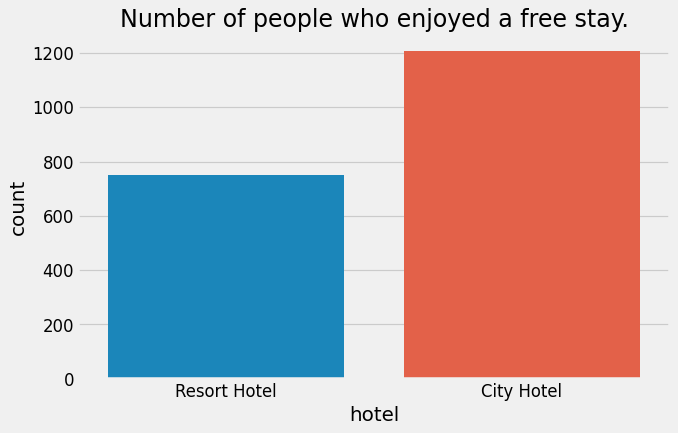

In [17]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('Number of people who enjoyed a free stay.')
sns.countplot(x='hotel', data=free_stay)
plt.show()

There is a difference of **37%** between the two hotels in favor of city hotels. Let's see if this percentage is also respected on all the data.

In [18]:
hotel_origin[hotel_origin['adr'] > 0].groupby(['hotel']).count()['adr']

hotel
City Hotel      78122
Resort Hotel    39308
Name: adr, dtype: int64

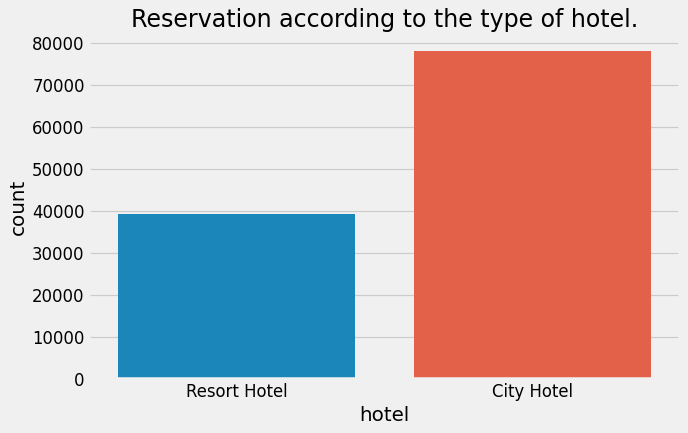

In [19]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('Reservation according to the type of hotel.')
sns.countplot(x='hotel', 
              data=hotel_origin[hotel_origin['adr'] > 0]
            )
plt.show()

As expected more than 50% of reservations were for city hotels

**Now, let's create a tally chart for each day of the week that people arrived.**

For this let's transform the `arrival_date` feature from object to date

In [20]:
hotel_origin['arrival_date'] = pd.to_datetime(hotel_origin['arrival_date'])

In [21]:
day_counter = hotel_origin['arrival_date'].dt.day_name().value_counts()

In [24]:
day_counter

Friday       19631
Thursday     19254
Monday       18171
Saturday     18055
Wednesday    16139
Sunday       14140
Tuesday      13999
Name: arrival_date, dtype: int64

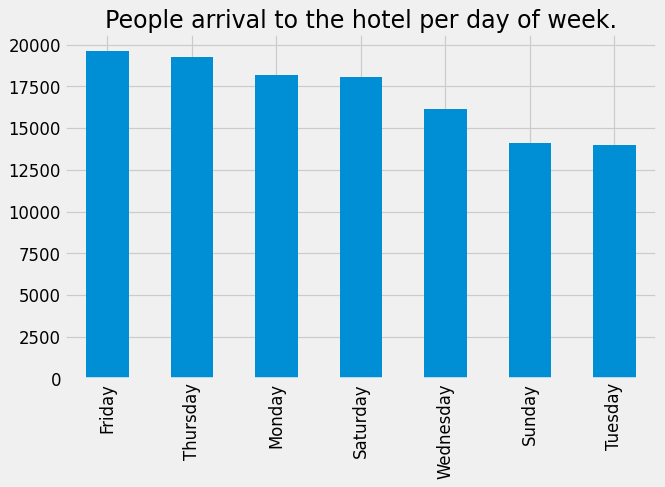

In [25]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('People arrival to the hotel per day of week.')
day_counter.plot.bar()
plt.show()

**Now, let's compare de top 10 countries from the people came.**

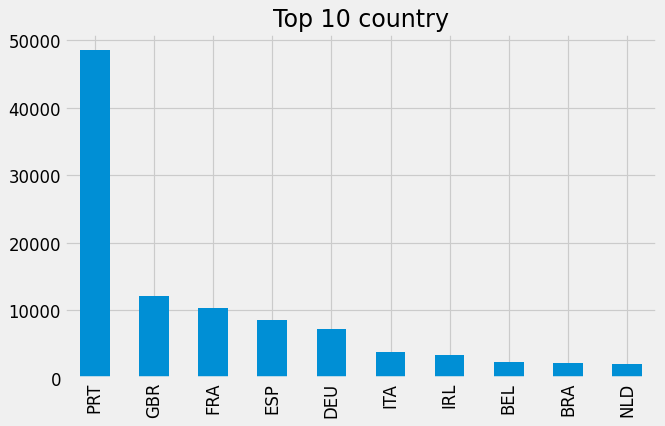

In [27]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('Top 10 country')
hotel_origin['country'].value_counts().head(10).plot.bar()
plt.show()

Most people come from Portugal

Let's see the average number of nights for a stay in hotel.

In [28]:
total_stay_days = hotel_origin['stays_in_week_nights'] + hotel_origin['stays_in_weekend_nights']
round(total_stay_days.mean(),2)

3.43

Let's see the average total cost of a stay.

In [29]:
total_paid = hotel_origin['adr'] * total_stay_days
round(total_paid.mean(),2)

357.85

Let's see the number of people who made special requests

In [31]:
hotel_origin['total_of_special_requests'].value_counts()

0    70317
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

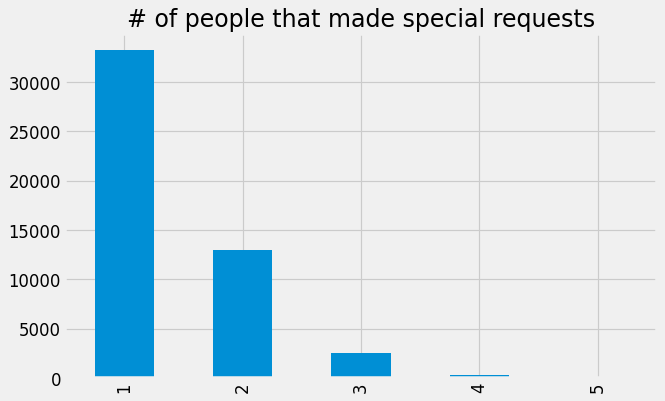

In [32]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('# of people that made special requests')
hotel_origin['total_of_special_requests'].value_counts()[1:].plot.bar()
plt.show()

Now, I would like to do an analysis according to the four seasons of the year. And since the data set does not contain a variable indicating the seasons, I will first create it and then continue the analysis.  
Now, I would like to do an analysis according to the four seasons of the year. And since the data set does not contain a variable indicating the seasons, I will first create it and then continue the analysis.
The problem that the season variable poses is that it associates days and months, so we will have to find a method that allows them to be associated in order to have an adequate result that respects the following pattern:  
  - winter: 21 Dec to 20 Mars
  - spring: 21 Mars to 20 Jun
  - summer: 21 Jun to 20 Sep
  - fall: 21 Sep to 20 Dec


Let's first see the minima and maxima of months and days

In [33]:
# min max month
hotel_origin['arrival_date'].dt.month.min(), hotel_origin['arrival_date'].dt.month.max()

(1, 12)

In [34]:
# min max day
hotel_origin['arrival_date'].dt.day.min(), hotel_origin['arrival_date'].dt.day.max()

(1, 31)

Now I'm going to add the days to the months and then multiply by 100 to keep the shape of the pattern the same

In [35]:
month_and_day = hotel_origin['arrival_date'].dt.day + hotel_origin['arrival_date'].dt.month * 100

In [36]:
month_and_day.min(), month_and_day.max()

(101, 1231)

101 means the first Jan and 1231 means the 31 of Dec

Now, let's create the season variable

In [37]:
season_period = ['winter', 'spring', 'summer', 'fall', 'winter2']

FROM_JAN_01 = 100
MARS_20 = 320
JUN_20 = 620
SEP_20 = 920
DEC_20 = 1220
DEC_31 = 1231

temp = pd.cut(
    month_and_day,
    bins=[FROM_JAN_01, MARS_20, JUN_20, SEP_20, DEC_20, DEC_31],
    labels=season_period
)

hotel_origin['season'] = temp.str.replace('2', '')

Let's group by this new feature

In [38]:
hotel_origin.groupby(['season']).mean()

,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,id_booking
season,,,,,,,,,,,,,,,,,,
fall,0.362193,103.348865,0.856958,2.283928,1.778422,0.057217,0.006270,0.035349,0.118196,0.124662,0.202532,80.057036,184.843418,3.948466,84.685349,0.060509,0.517459,56320.968766
spring,0.402984,108.393528,0.896470,2.466461,1.854869,0.087114,0.005678,0.028655,0.028302,0.148338,0.203177,90.558562,200.052196,3.294910,105.782876,0.054928,0.530656,62919.880171
summer,0.378158,130.400650,1.044908,2.760943,1.962107,0.162233,0.011295,0.019664,0.133478,0.091739,0.218039,84.506927,162.588492,0.674485,126.030507,0.066874,0.662784,59506.900433
winter,0.320083,55.826452,0.863427,2.371614,1.775368,0.086796,0.007795,0.052565,0.065108,0.207125,0.214615,92.145203,199.132168,1.719058,76.130202,0.068984,0.544552,58972.551825


Let's see the `adr` in terms of the seasons

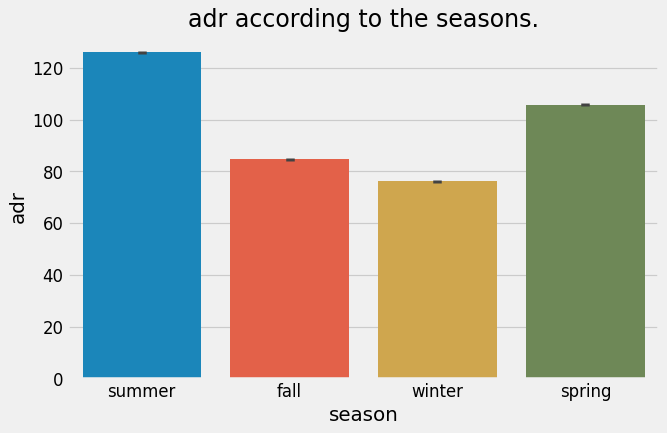

In [39]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('adr according to the seasons.')
sns.barplot(x='season', y='adr', data=hotel_origin)
plt.show()

The summer season is the season when the adr is at the max
Let's compare by hotels type.

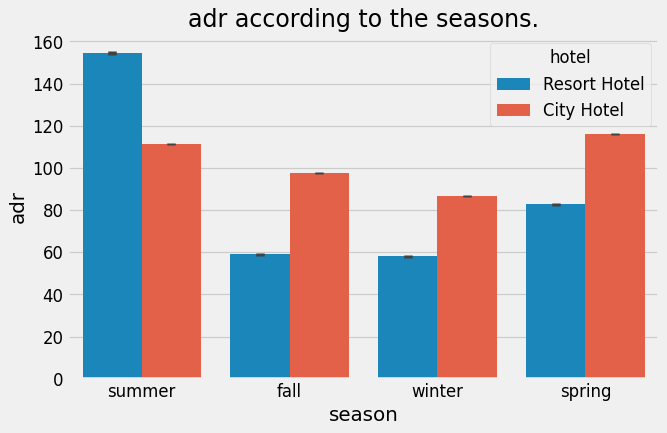

In [40]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('adr according to the seasons.')
sns.barplot(x='season', y='adr', data=hotel_origin, hue='hotel')
plt.show()

The most surprising is that although the city hotel attracts more customers than the hotel resort as seen in the previous graphs, in summer the hotel resort managed to attract more customers.

Let's see which month has the max of cancellations.

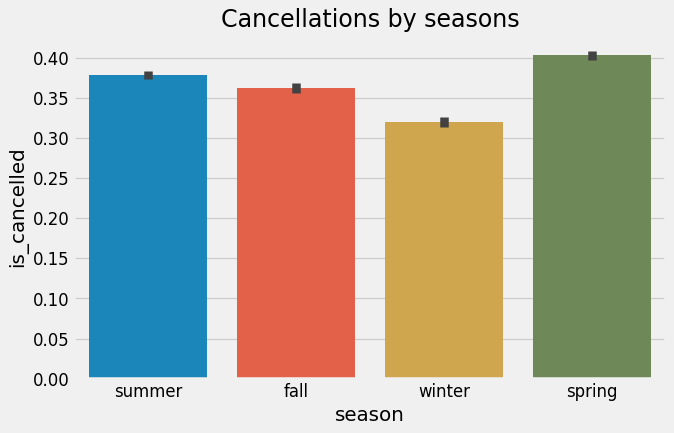

In [42]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('Cancellations by seasons')
sns.barplot(x='season', y='is_cancelled', data=hotel_origin)
plt.show()

It is quite normal that the maximum cancellation is in the spring because it is the beginning of the summer and people in general try to book in advance, unlike the winter in the fall.

Let’s see the distributions of the market according to the seasons

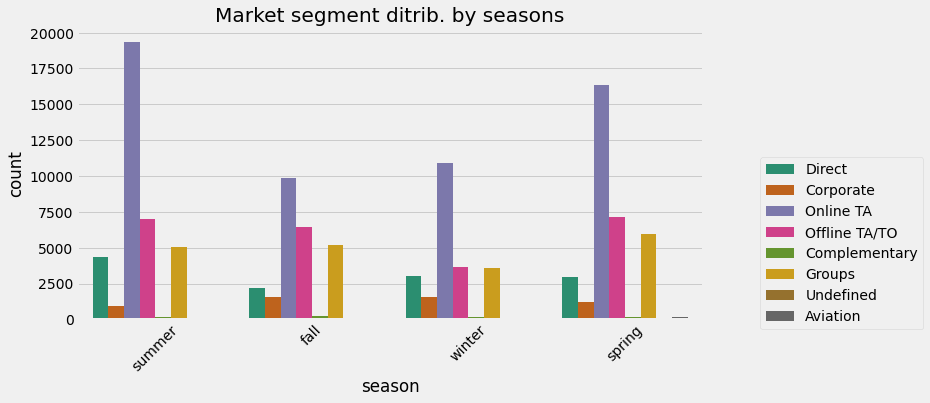

In [43]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.title('Market segment ditrib. by seasons')
sns.countplot(x='season', data=hotel_origin,
              hue='market_segment',
              palette='Dark2'
              )
plt.legend(bbox_to_anchor=(1.08, 0.58))
plt.show()

We note that the customers who have used a travel agent (TA) or a tour operator (TO), represent a maximum which is spread over all seasons and therefore all year round. But, what about the adr? Let's see if it's people spending the most or not?

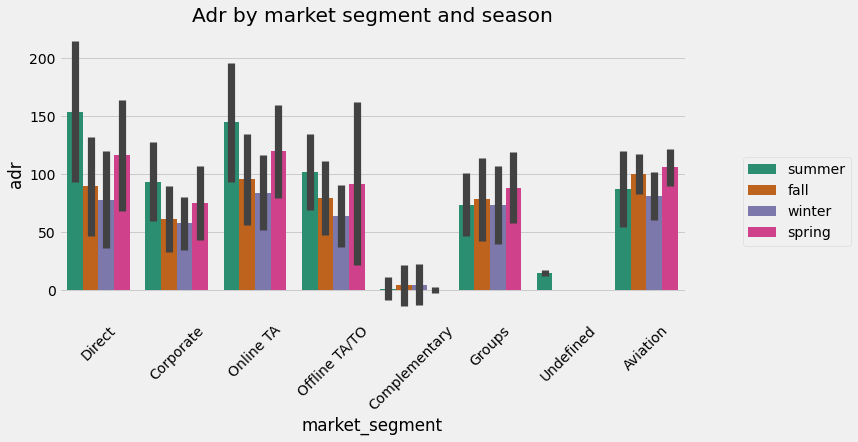

In [44]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.title('Adr by market segment and season')
sns.barplot(x='market_segment', y='adr', data=hotel_origin,
              hue='season',
              estimator=np.mean,
              ci='sd',
              palette='Dark2'
              )
plt.legend(bbox_to_anchor=(1.08, 0.58))
plt.show()

We see that they are not the only ones who spend the most and therefore they are not the only ones to spend the most days in the hotel.

Now I'm going to move on to some numeric variables and see if I can glean some useful information.

Let's compare week nights with weekend nights

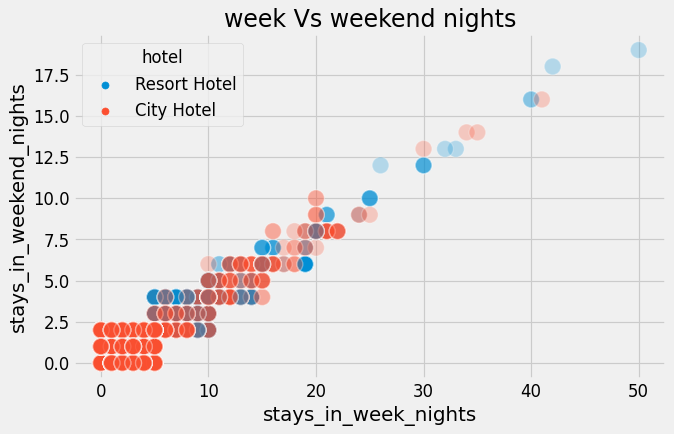

In [45]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('week Vs weekend nights')
sns.scatterplot(y='stays_in_weekend_nights', x='stays_in_week_nights',
                data=hotel_origin, hue='hotel', s=200, alpha=0.25
)
plt.show()

We see that there is a certain trend but it is not strong. Also we see that people prefer the city hotel but spend less time whether on weekends or other, but they prefer to spend long stays in the hotel resort.

Let's take a look at `previous_cancellations` and `previous_bookings_not_canceled` variables.

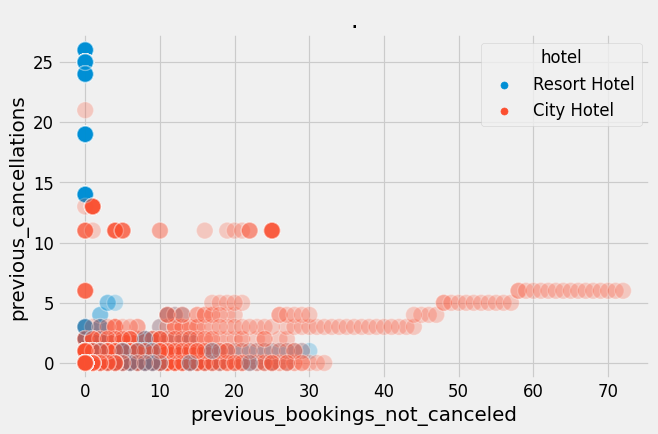

In [46]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('.')
sns.scatterplot(y='previous_cancellations', x='previous_bookings_not_canceled',
                data=hotel_origin, hue='hotel', s=200, alpha=0.25
)
plt.show()

We note that the majority of customers do not have a previous uncancelled reservation, either because they were satisfied or because it is their first reservation on the other side, we note that the maximum number of canceled reservations was made at the resort hotel.

Now, let's compare the total of special requests to the previous non-cancelled reservation

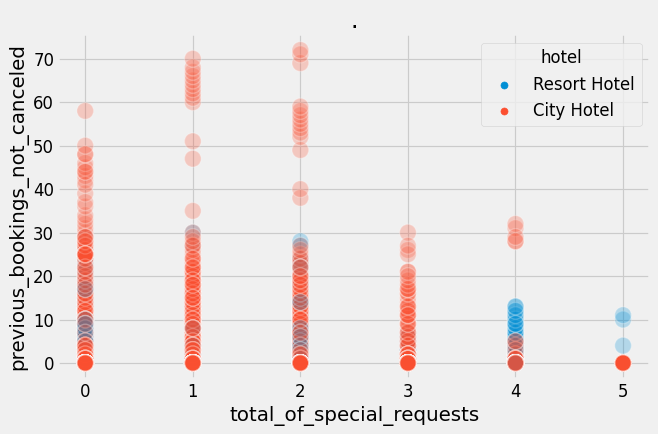

In [47]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('.')
sns.scatterplot(x='total_of_special_requests', y='previous_bookings_not_canceled',
                data=hotel_origin, hue='hotel', s=200, alpha=0.25
)
plt.show()

It is clear that the majority of customers have made little or no special request and this could give an idea of the quality of service in the hotel.

I'm completing the exploratory data analysis here, though there's still a ton of information to pull from. However, I will focus on feature engineering where I will still try to extract important information in order to establish a machine learning model that will be far from under/over fitting.